# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# For removing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Volume_Sales Data.xlsx")

# Initial Inspection of dataset

In [3]:
df.shape

(56, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 21 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   County                                               56 non-null     object        
 1   Date                                                 56 non-null     datetime64[ns]
 2   Volume                                               56 non-null     float64       
 3   Consumer Price Index_Monthly                         56 non-null     float64       
 4   Index, Retail Sales, Nominal (US$ Value)_Monthly     56 non-null     float64       
 5   Industrial Production Index_Monthly                  56 non-null     float64       
 6   Wholesale-Producer Price Index, US$ basis_Monthly    56 non-null     float64       
 7   Nominal Private Consumption, US$_Quarterly           56 non-null     float64       
 8   No

# Checking for null values

In [5]:
df.isnull().sum()

County                                                 0
Date                                                   0
Volume                                                 0
Consumer Price Index_Monthly                           0
Index, Retail Sales, Nominal (US$ Value)_Monthly       0
Industrial Production Index_Monthly                    0
Wholesale-Producer Price Index, US$ basis_Monthly      0
Nominal Private Consumption, US$_Quarterly             0
Nominal GDP (Gross Domestic Product), US$_Quarterly    0
Real Consumption Per Capita, US$_Quarterly             0
Nominal Gross Private Saving, US$_Quarterly            0
Nominal Gross Domestic Saving, US$_Quarterly           0
Real GDP Per Capita, US$_Quarterly                     0
Real GDP at Factor Cost: Services, US$_Quarterly       0
Unemployment Rate_Quarterly                            0
Population: Age Bracket 15-64_Quarterly                0
Population: Age Bracket 65+_Quarterly                  0
Disposable Personal Income, US$

In [6]:
df.head(5)

,County,Date,Volume,Consumer Price Index_Monthly,"Index, Retail Sales, Nominal (US$ Value)_Monthly",Industrial Production Index_Monthly,"Wholesale-Producer Price Index, US$ basis_Monthly","Nominal Private Consumption, US$_Quarterly","Nominal GDP (Gross Domestic Product), US$_Quarterly","Real Consumption Per Capita, US$_Quarterly",...,"Nominal Gross Domestic Saving, US$_Quarterly","Real GDP Per Capita, US$_Quarterly","Real GDP at Factor Cost: Services, US$_Quarterly",Unemployment Rate_Quarterly,Population: Age Bracket 15-64_Quarterly,Population: Age Bracket 65+_Quarterly,"Disposable Personal Income, US$_Quarterly","Disposable personal income, real, US$_Quarterly",T-Avg,Selling Days
0,US,2017-01-01,525295.37,102.798446,108.141005,103.139119,99.185522,921.722522,1593.451595,25821.417254,...,342.117623,44117.121923,1053.563919,6.700000,24.679887,6.111323,875.377715,880.118585,15.2,22
1,US,2017-02-01,578702.22,102.640416,107.625725,102.585456,99.931902,921.722522,1593.451595,25821.417254,...,342.117623,44117.121923,1053.563919,6.700000,24.679887,6.111323,875.377715,880.118585,16.1,20
2,US,2017-03-01,696500.24,102.482386,105.746715,102.976041,98.373860,921.722522,1593.451595,25821.417254,...,342.117623,44117.121923,1053.563919,6.700000,24.679887,6.111323,875.377715,880.118585,20.8,23
3,US,2017-04-01,712376.13,102.798446,106.948659,103.015607,98.570688,919.010534,1583.857231,26093.250864,...,336.050564,44465.676000,1065.497749,6.533333,24.704786,6.161413,876.774817,895.936166,36.7,20
4,US,2017-05-01,931286.20,102.640416,105.221726,104.310608,97.230527,919.010534,1583.857231,26093.250864,...,336.050564,44465.676000,1065.497749,6.533333,24.704786,6.161413,876.774817,895.936166,49.5,23


In [7]:
number_of_unique_values = len(df['County'].unique())

print(f'The unique values in the County column are {number_of_unique_values}.\n')


The unique values in the County column are 1.



### Thus, county column is redundant for further analysis so we remove it from our dataset.

In [8]:
df = df.drop(columns=['County'])

# Creating Dummy variables of months

In [9]:
df['Quarter'] = pd.DatetimeIndex(df.Date).quarter
df['Year'] = pd.DatetimeIndex(df.Date).year
df['Month'] = pd.DatetimeIndex(df.Date).month

df_dummies=pd.get_dummies(df ,columns=['Month','Quarter'])
df_dummies.drop(columns = ['Consumer Price Index_Monthly', 'Index, Retail Sales, Nominal (US$ Value)_Monthly',
                'Industrial Production Index_Monthly','Wholesale-Producer Price Index, US$ basis_Monthly',
                'Nominal Private Consumption, US$_Quarterly', 'Nominal GDP (Gross Domestic Product), US$_Quarterly',
                'Real Consumption Per Capita, US$_Quarterly', 'Nominal Gross Private Saving, US$_Quarterly',
                'Nominal Gross Domestic Saving, US$_Quarterly', 'Real GDP Per Capita, US$_Quarterly',
                'Real GDP at Factor Cost: Services, US$_Quarterly', 'Unemployment Rate_Quarterly',
                'Population: Age Bracket 15-64_Quarterly', 'Population: Age Bracket 65+_Quarterly',
                'Disposable Personal Income, US$_Quarterly','Disposable personal income, real, US$_Quarterly',
                'T-Avg' ,'Selling Days' ,'Year'], inplace=True)
df_dummies.head()

,Date,Volume,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,2017-01-01,525295.37,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2017-02-01,578702.22,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2017-03-01,696500.24,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2017-04-01,712376.13,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2017-05-01,931286.20,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [10]:
df_seasonal_corr = df_dummies.corr(method='pearson').abs()
df_seasonal_corr.head(1)

,Volume,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Quarter_1,Quarter_2,Quarter_3,Quarter_4
Volume,1.0,0.470719,0.419457,0.140262,0.096227,0.235079,0.498325,0.407781,0.301489,0.107837,0.095,0.147905,0.000847,0.663521,0.410292,0.402945,0.151927


In [11]:
time_corr_col = []
feature_count = -1
for i in df_seasonal_corr.iloc[0,:]:
    feature_count+=1
    if i >=0.40 and i <1:
        time_corr_col.append(df_seasonal_corr.iloc[0,:].index[feature_count])
time_corr_col

['Month_1',
 'Month_2',
 'Month_6',
 'Month_7',
 'Quarter_1',
 'Quarter_2',
 'Quarter_3']

In [12]:
def top_time_corr(df):
    df['Quarter'] = pd.DatetimeIndex(df.Date).quarter
    df['Year'] = pd.DatetimeIndex(df.Date).year
    df['Month'] = pd.DatetimeIndex(df.Date).month
    df_dummies=pd.get_dummies(df ,columns=['Month','Quarter'])
    df_dummies.drop(columns = ['Consumer Price Index_Monthly', 'Index, Retail Sales, Nominal (US$ Value)_Monthly',
                'Industrial Production Index_Monthly','Wholesale-Producer Price Index, US$ basis_Monthly',
                'Nominal Private Consumption, US$_Quarterly', 'Nominal GDP (Gross Domestic Product), US$_Quarterly',
                'Real Consumption Per Capita, US$_Quarterly', 'Nominal Gross Private Saving, US$_Quarterly',
                'Nominal Gross Domestic Saving, US$_Quarterly', 'Real GDP Per Capita, US$_Quarterly',
                'Real GDP at Factor Cost: Services, US$_Quarterly', 'Unemployment Rate_Quarterly',
                'Population: Age Bracket 15-64_Quarterly', 'Population: Age Bracket 65+_Quarterly',
                'Disposable Personal Income, US$_Quarterly','Disposable personal income, real, US$_Quarterly',
                'T-Avg' ,'Selling Days' ,'Year'], inplace=True)
    df_seasonal_corr = df_dummies.corr(method='pearson').abs()
    time_corr_col = []
    feature_count = -1
    for i in df_seasonal_corr.iloc[0,:]:
        feature_count+=1
        if i >=0.40 and i <1:
            time_corr_col.append(df_seasonal_corr.iloc[0,:].index[feature_count])
    return time_corr_col  

In [13]:
top_time_corr(df)

['Month_1',
 'Month_2',
 'Month_6',
 'Month_7',
 'Quarter_1',
 'Quarter_2',
 'Quarter_3']

In [14]:
df.head()

,Date,Volume,Consumer Price Index_Monthly,"Index, Retail Sales, Nominal (US$ Value)_Monthly",Industrial Production Index_Monthly,"Wholesale-Producer Price Index, US$ basis_Monthly","Nominal Private Consumption, US$_Quarterly","Nominal GDP (Gross Domestic Product), US$_Quarterly","Real Consumption Per Capita, US$_Quarterly","Nominal Gross Private Saving, US$_Quarterly",...,Unemployment Rate_Quarterly,Population: Age Bracket 15-64_Quarterly,Population: Age Bracket 65+_Quarterly,"Disposable Personal Income, US$_Quarterly","Disposable personal income, real, US$_Quarterly",T-Avg,Selling Days,Quarter,Year,Month
0,2017-01-01,525295.37,102.798446,108.141005,103.139119,99.185522,921.722522,1593.451595,25821.417254,357.142569,...,6.700000,24.679887,6.111323,875.377715,880.118585,15.2,22,1,2017,1
1,2017-02-01,578702.22,102.640416,107.625725,102.585456,99.931902,921.722522,1593.451595,25821.417254,357.142569,...,6.700000,24.679887,6.111323,875.377715,880.118585,16.1,20,1,2017,2
2,2017-03-01,696500.24,102.482386,105.746715,102.976041,98.373860,921.722522,1593.451595,25821.417254,357.142569,...,6.700000,24.679887,6.111323,875.377715,880.118585,20.8,23,1,2017,3
3,2017-04-01,712376.13,102.798446,106.948659,103.015607,98.570688,919.010534,1583.857231,26093.250864,339.206345,...,6.533333,24.704786,6.161413,876.774817,895.936166,36.7,20,2,2017,4
4,2017-05-01,931286.20,102.640416,105.221726,104.310608,97.230527,919.010534,1583.857231,26093.250864,339.206345,...,6.533333,24.704786,6.161413,876.774817,895.936166,49.5,23,2,2017,5


### Setting Date column as index for the dataframe

In [15]:
df_eda = df.set_index('Date')
df_eda 

,Volume,Consumer Price Index_Monthly,"Index, Retail Sales, Nominal (US$ Value)_Monthly",Industrial Production Index_Monthly,"Wholesale-Producer Price Index, US$ basis_Monthly","Nominal Private Consumption, US$_Quarterly","Nominal GDP (Gross Domestic Product), US$_Quarterly","Real Consumption Per Capita, US$_Quarterly","Nominal Gross Private Saving, US$_Quarterly","Nominal Gross Domestic Saving, US$_Quarterly",...,Unemployment Rate_Quarterly,Population: Age Bracket 15-64_Quarterly,Population: Age Bracket 65+_Quarterly,"Disposable Personal Income, US$_Quarterly","Disposable personal income, real, US$_Quarterly",T-Avg,Selling Days,Quarter,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,525295.37,102.798446,108.141005,103.139119,99.185522,921.722522,1593.451595,25821.417254,357.142569,342.117623,...,6.700000,24.679887,6.111323,875.377715,880.118585,15.2,22,1,2017,1
2017-02-01,578702.22,102.640416,107.625725,102.585456,99.931902,921.722522,1593.451595,25821.417254,357.142569,342.117623,...,6.700000,24.679887,6.111323,875.377715,880.118585,16.1,20,1,2017,2
2017-03-01,696500.24,102.482386,105.746715,102.976041,98.373860,921.722522,1593.451595,25821.417254,357.142569,342.117623,...,6.700000,24.679887,6.111323,875.377715,880.118585,20.8,23,1,2017,3
2017-04-01,712376.13,102.798446,106.948659,103.015607,98.570688,919.010534,1583.857231,26093.250864,339.206345,336.050564,...,6.533333,24.704786,6.161413,876.774817,895.936166,36.7,20,2,2017,4
2017-05-01,931286.20,102.640416,105.221726,104.310608,97.230527,919.010534,1583.857231,26093.250864,339.206345,336.050564,...,6.533333,24.704786,6.161413,876.774817,895.936166,49.5,23,2,2017,5
2017-06-01,1037797.77,102.640416,107.897150,104.203938,98.575940,919.010534,1583.857231,26093.250864,339.206345,336.050564,...,6.533333,24.704786,6.161413,876.774817,895.936166,58.2,22,2,2017,6
2017-07-01,930170.32,102.798446,113.249076,104.510311,102.021096,994.971392,1709.900205,26224.948544,372.112729,360.309764,...,6.233333,24.728547,6.211645,961.162413,913.606886,63.8,21,3,2017,7
2017-08-01,978928.31,103.035491,114.154058,103.662038,103.267723,994.971392,1709.900205,26224.948544,372.112729,360.309764,...,6.233333,24.728547,6.211645,961.162413,913.606886,62.4,23,3,2017,8
2017-09-01,708739.23,103.272536,116.863036,103.942746,105.797302,994.971392,1709.900205,26224.948544,372.112729,360.309764,...,6.233333,24.728547,6.211645,961.162413,913.606886,55.4,21,3,2017,9


In [16]:
df_eda.head(2)

,Volume,Consumer Price Index_Monthly,"Index, Retail Sales, Nominal (US$ Value)_Monthly",Industrial Production Index_Monthly,"Wholesale-Producer Price Index, US$ basis_Monthly","Nominal Private Consumption, US$_Quarterly","Nominal GDP (Gross Domestic Product), US$_Quarterly","Real Consumption Per Capita, US$_Quarterly","Nominal Gross Private Saving, US$_Quarterly","Nominal Gross Domestic Saving, US$_Quarterly",...,Unemployment Rate_Quarterly,Population: Age Bracket 15-64_Quarterly,Population: Age Bracket 65+_Quarterly,"Disposable Personal Income, US$_Quarterly","Disposable personal income, real, US$_Quarterly",T-Avg,Selling Days,Quarter,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,525295.37,102.798446,108.141005,103.139119,99.185522,921.722522,1593.451595,25821.417254,357.142569,342.117623,...,6.7,24.679887,6.111323,875.377715,880.118585,15.2,22,1,2017,1
2017-02-01,578702.22,102.640416,107.625725,102.585456,99.931902,921.722522,1593.451595,25821.417254,357.142569,342.117623,...,6.7,24.679887,6.111323,875.377715,880.118585,16.1,20,1,2017,2


# EDA on the dataset

# Scatterplot

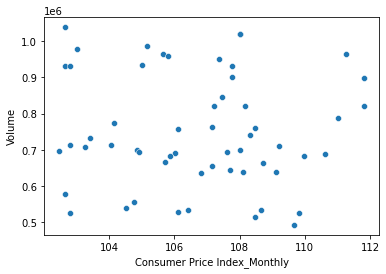

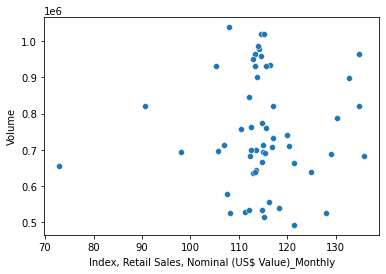

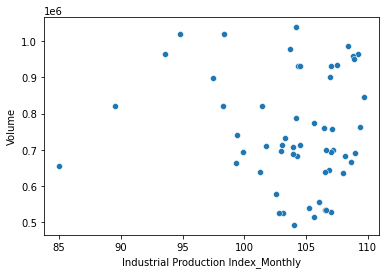

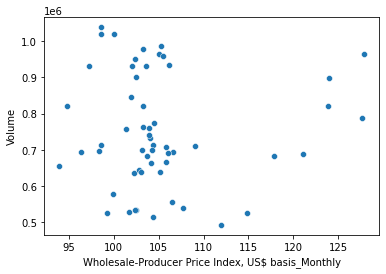

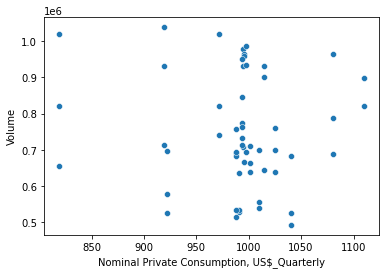

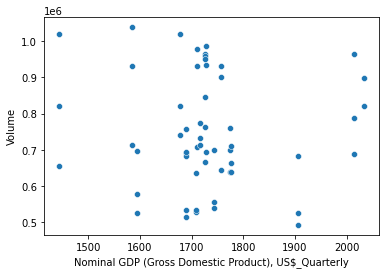

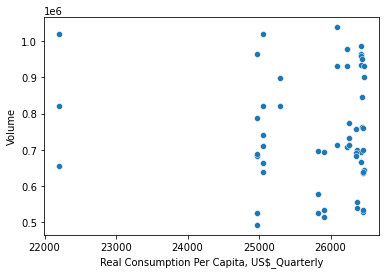

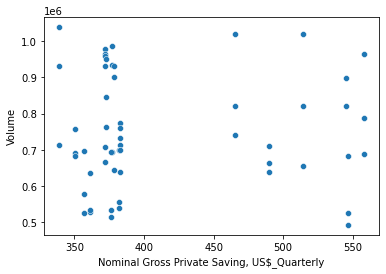

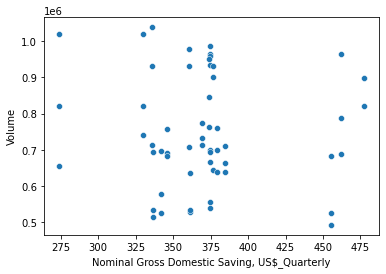

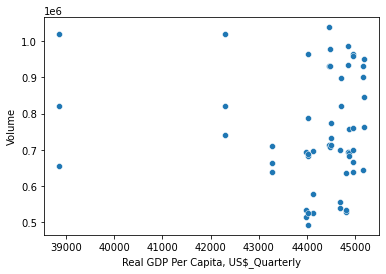

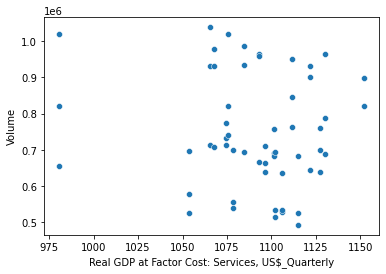

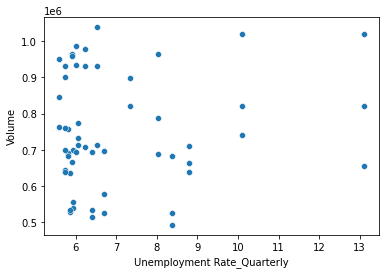

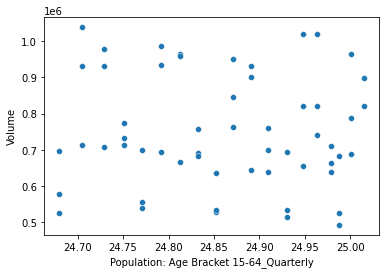

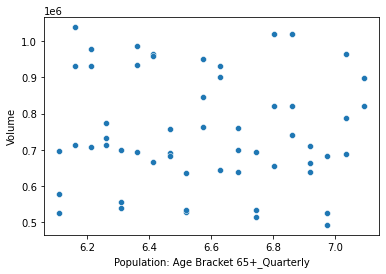

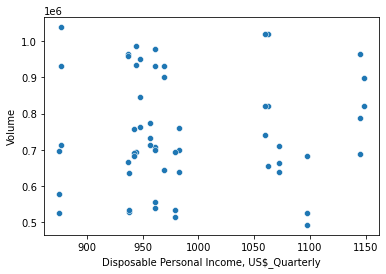

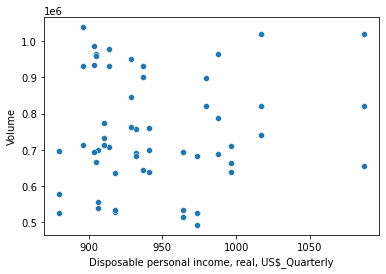

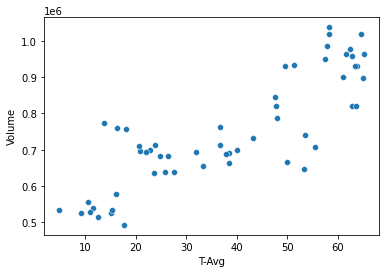

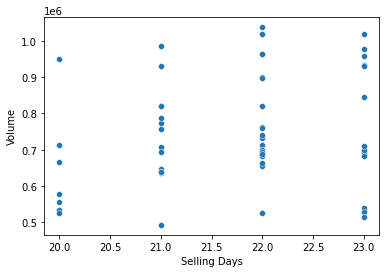

In [17]:
# Visualizing the spread of data along with the target variable.
for i in range(1,19):
    sns.scatterplot(x=df_eda.iloc[:,i], y=df_eda['Volume'])
    plt.show()

# Distplot

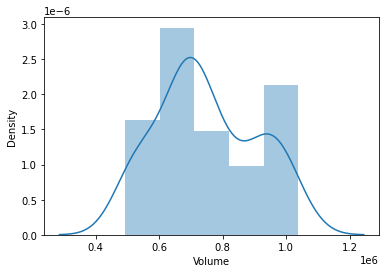

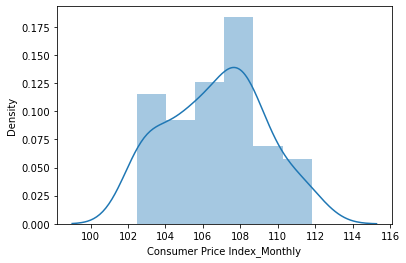

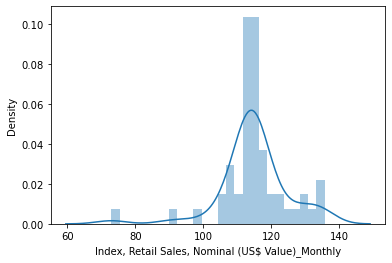

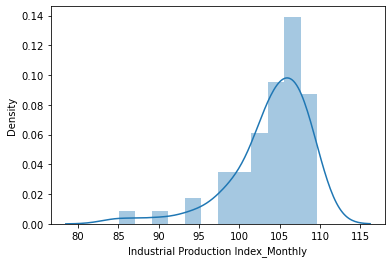

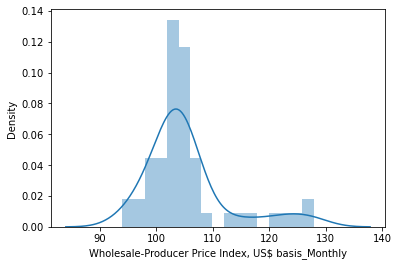

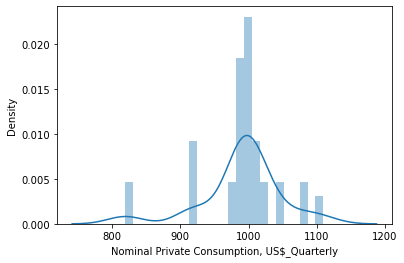

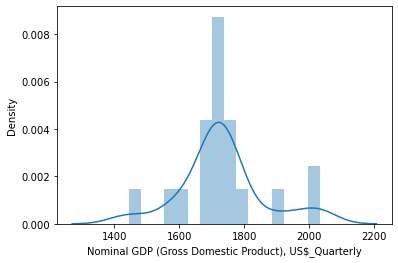

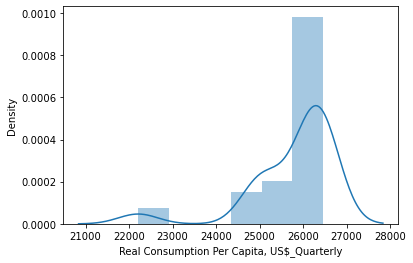

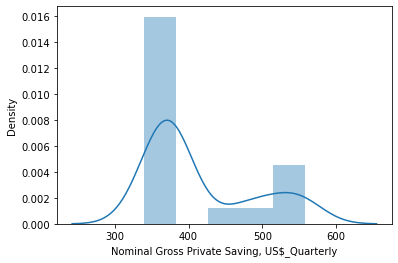

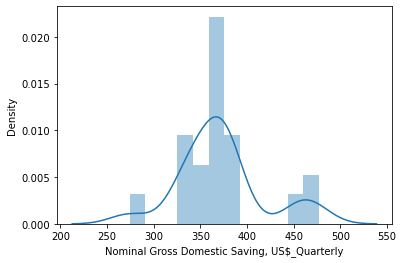

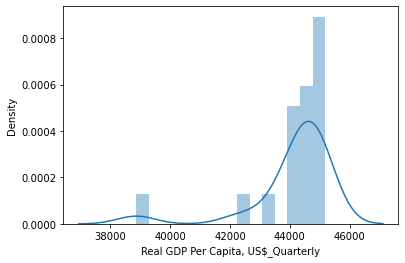

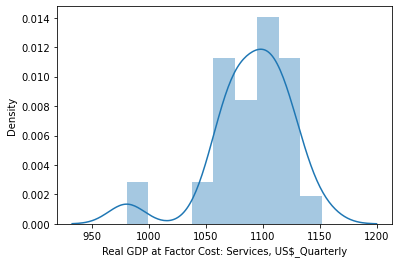

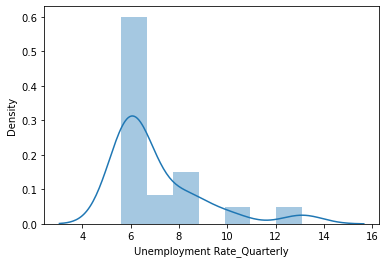

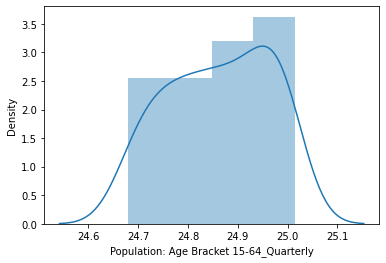

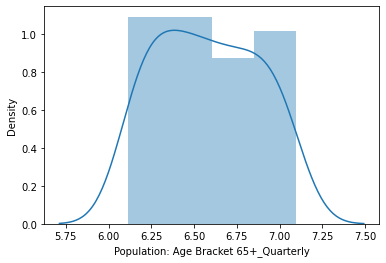

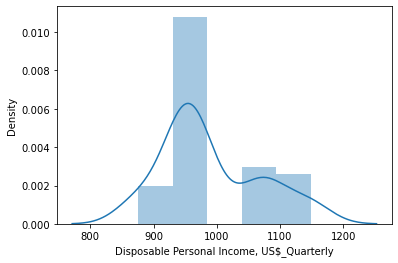

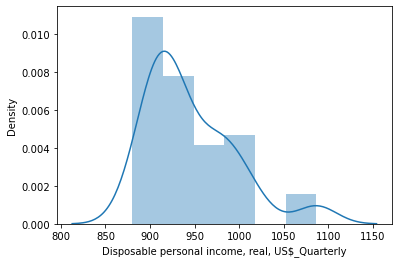

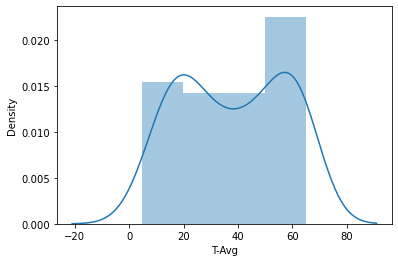

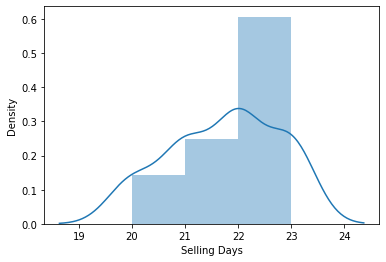

In [18]:
for i in range(0,19):
    sns.distplot(x=df_eda.iloc[:,i])
    plt.xlabel(df_eda.columns[i])
    plt.show()


# Box-plot

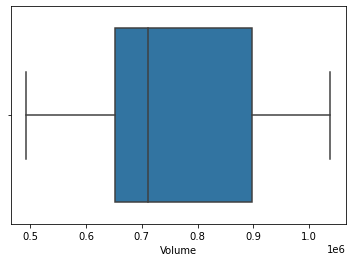

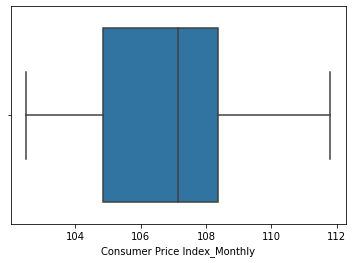

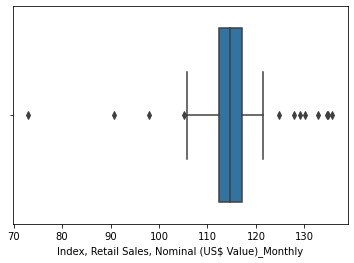

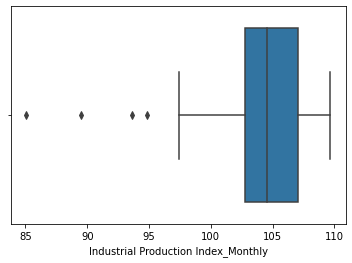

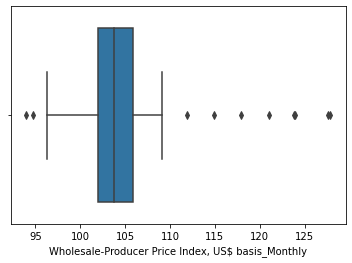

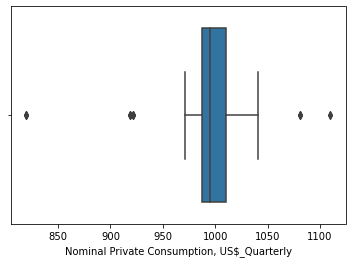

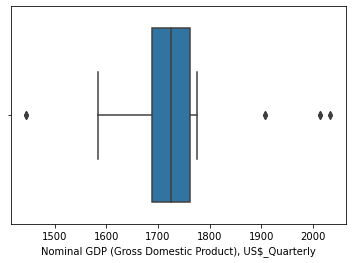

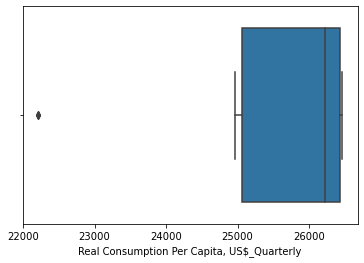

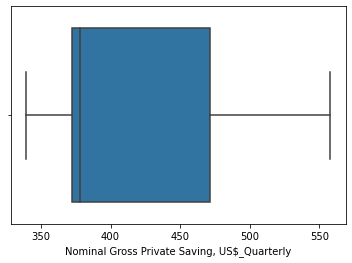

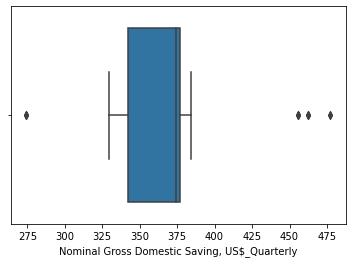

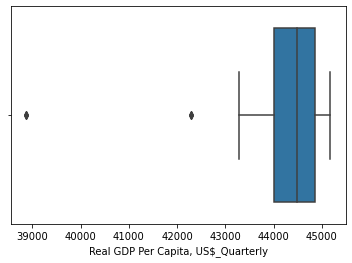

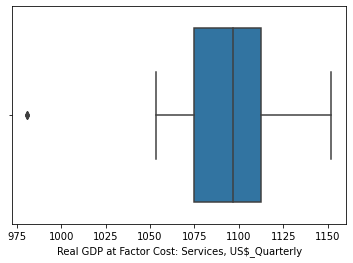

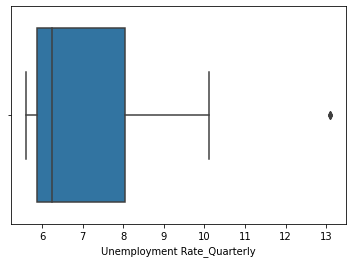

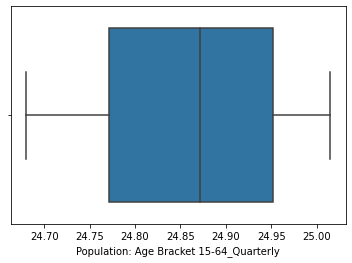

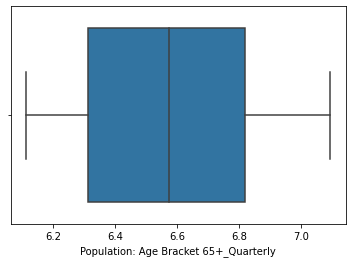

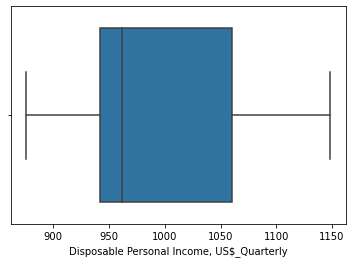

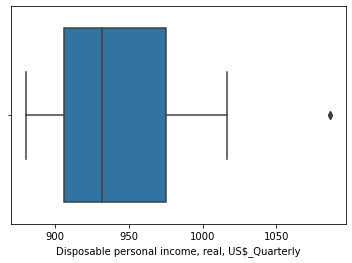

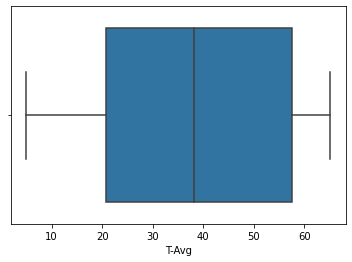

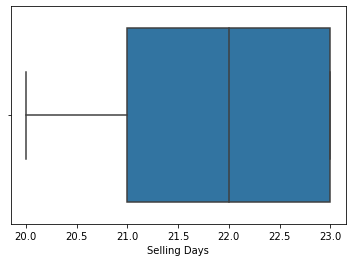

In [19]:
# Visualizing outliers using boxplots.
for i in range(0,19):
    sns.boxplot(x=df_eda.iloc[:,i])
    plt.show()

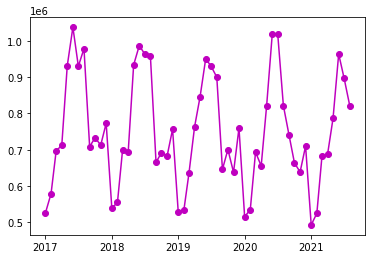

<Figure size 1080x720 with 0 Axes>

In [20]:
plt.plot(df_eda['Volume'], Marker = 'o', color='m')
plt.figure(figsize=(15,10))
plt.show()

In [21]:
# Checking the correlation among the features

df_corr = df_eda.corr(method='pearson')
df_corr.iloc[0]


Volume                                                 1.000000
Consumer Price Index_Monthly                          -0.048377
Index, Retail Sales, Nominal (US$ Value)_Monthly       0.031817
Industrial Production Index_Monthly                   -0.094004
Wholesale-Producer Price Index, US$ basis_Monthly      0.013235
Nominal Private Consumption, US$_Quarterly            -0.073087
Nominal GDP (Gross Domestic Product), US$_Quarterly   -0.052927
Real Consumption Per Capita, US$_Quarterly            -0.065157
Nominal Gross Private Saving, US$_Quarterly            0.019222
Nominal Gross Domestic Saving, US$_Quarterly          -0.065208
Real GDP Per Capita, US$_Quarterly                    -0.076811
Real GDP at Factor Cost: Services, US$_Quarterly      -0.106959
Unemployment Rate_Quarterly                            0.099104
Population: Age Bracket 15-64_Quarterly               -0.043944
Population: Age Bracket 65+_Quarterly                 -0.041991
Disposable Personal Income, US$_Quarterl

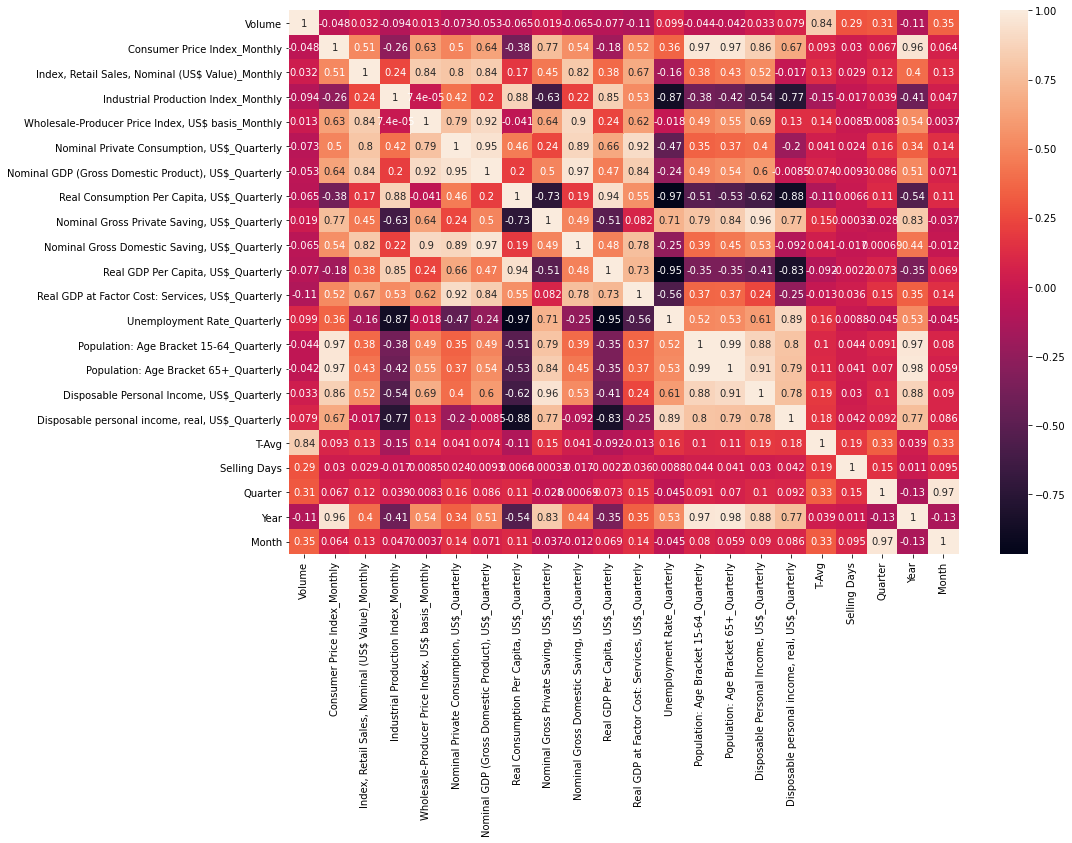

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, annot=True)
plt.show()

In [23]:
# Converting the upper case letter into lower case words in the column names.
df_eda.columns = [i.lower() for i in df_eda.columns]

# Creating buckets based upon certain unique characters in column names.
bucket_features = ['index', 'gdp', 'consumption', 'saving', 'personal income', 'population']
bucket_dict = {}
list_index = []
for k in range(0,6):
    for i in df_eda.columns:
        if bucket_features[k] in i:
            list_index.append(i)
    bucket_dict[k] = list_index
    list_index = []
# final_dict = dict(zip(bucket_features,bucket_dict.values()))
# final_dict     
bucket_features = [i for i in bucket_dict.values()]
bucket_features

[['consumer price index_monthly',
  'index, retail sales, nominal (us$ value)_monthly',
  'industrial production index_monthly',
  'wholesale-producer price index, us$ basis_monthly'],
 ['nominal gdp (gross domestic product), us$_quarterly',
  'real gdp per capita, us$_quarterly',
  'real gdp at factor cost: services, us$_quarterly'],
 ['nominal private consumption, us$_quarterly',
  'real consumption per capita, us$_quarterly'],
 ['nominal gross private saving, us$_quarterly',
  'nominal gross domestic saving, us$_quarterly'],
 ['disposable personal income, us$_quarterly',
  'disposable personal income, real, us$_quarterly'],
 ['population: age bracket 15-64_quarterly',
  'population: age bracket 65+_quarterly']]

In [24]:
# creating a set of all the columns that were stored in the buckets:-
set_of_bucket_features = set()
for i in bucket_dict.values():
    for j in i:
        set_of_bucket_features.add(j) 
# Set of all the features and bucket features:-
set_of_all_features = set(df_eda.columns) 
left_of_features = set_of_all_features - set_of_bucket_features
left_of_features

{'month',
 'quarter',
 'selling days',
 't-avg',
 'unemployment rate_quarterly',
 'volume',
 'year'}

In [25]:
def var_selection_corr(bucket_features,df_eda):
    final_var=[]
    for i in bucket_features:
        i.append('volume')
        feature_df = df_eda[i]
        corr_features = feature_df.corr().abs()
        volume_df = corr_features['volume'].drop('volume', axis=0)
        volume_df = volume_df.sort_index(ascending=False, axis=0)
        final_var.append(volume_df.index[0])
    return final_var

In [26]:
# final_variable list.
list_of_leftout_features = list(left_of_features)
final_features = var_selection_corr(bucket_features,df_eda)
for i in list_of_leftout_features:
    final_features.append(i)


In [27]:
final_features

['wholesale-producer price index, us$ basis_monthly',
 'real gdp per capita, us$_quarterly',
 'real consumption per capita, us$_quarterly',
 'nominal gross private saving, us$_quarterly',
 'disposable personal income, us$_quarterly',
 'population: age bracket 65+_quarterly',
 'selling days',
 'month',
 'quarter',
 'year',
 't-avg',
 'volume',
 'unemployment rate_quarterly']

In [28]:
# Check the percentage of outliers and replace the outlier with upper and lower quartile bounds.
# Use flooring or capping methods aswell.

#### Based upon our observation, we found that the following columns have outliers:-
1. Disposable personal income, real, US_Quarterly.
2. Unemployment Rate_Quarterly.
3. Real GDP at Factor Cost: Services, US_Quarterly.
4. Real GDP Per Capita, US_Quarterly.
5. Nominal Gross Domestic Saving, US_Quarterly.
6. Real Consumption Per Capita, US_Quarterly.
7. Nominal GDP (Gross Domestic Product), US_Quarterly.
8. Nominal Private Consumption, US_Quarterly.
9. Wholesale-Producer Price Index, US basis_Monthly.
10. Industrial Production Index_Monthly.
11. Index, Retail Sales, Nominal (US Value)_Monthly.



# Assumptions of Linear Regression:-

In [29]:
independent_variable_bucket = []

In [30]:
def fit_linear_reg(X,Y,X_test,Y_test):
    #Fit linear regression model and return RSS and R squared values
    model_k = LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    R_squared_test = model_k.score(X_test,Y_test)
    Accuracy = 100 - mape(Y_test,model_k.predict(X_test))
    Elasticities = model_k.coef_
    Features = model_k.feature_names_in_
    return RSS, R_squared, Elasticities,Features,R_squared_test,Accuracy

# Check variance threshold

In [31]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

In [32]:
df_eda.describe()

,volume,consumer price index_monthly,"index, retail sales, nominal (us$ value)_monthly",industrial production index_monthly,"wholesale-producer price index, us$ basis_monthly","nominal private consumption, us$_quarterly","nominal gdp (gross domestic product), us$_quarterly","real consumption per capita, us$_quarterly","nominal gross private saving, us$_quarterly","nominal gross domestic saving, us$_quarterly",...,unemployment rate_quarterly,population: age bracket 15-64_quarterly,population: age bracket 65+_quarterly,"disposable personal income, us$_quarterly","disposable personal income, real, us$_quarterly",t-avg,selling days,quarter,year,month
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,7.492947e+05,106.698344,114.918454,103.915051,105.318428,990.249256,1731.397316,25757.872423,414.668727,371.199959,...,7.060119,24.861489,6.577561,989.680146,945.438433,38.041071,21.732143,2.410714,2018.857143,6.214286
std,1.538283e+05,2.585347,10.018874,4.873525,7.470898,58.146099,129.364275,1021.880187,72.399357,45.830354,...,1.902677,0.102959,0.297282,77.630387,50.340181,19.276974,1.017860,1.108263,1.367527,3.415016
min,4.925231e+05,102.482386,72.963650,85.033979,93.935653,819.297706,1444.222425,22207.465555,339.206345,274.047814,...,5.600000,24.679887,6.111323,875.377715,880.118585,4.900000,20.000000,1.000000,2017.000000,1.000000
25%,6.528689e+05,104.833081,112.394554,102.739043,101.993638,987.676707,1689.049249,25058.625891,371.976127,342.117623,...,5.866667,24.770959,6.311111,942.109883,906.212233,20.750000,21.000000,1.000000,2018.000000,3.000000
50%,7.111818e+05,107.144268,114.646068,104.526753,103.798997,994.971392,1725.532544,26224.948544,378.318484,373.978666,...,6.233333,24.871217,6.573959,961.162413,931.932855,38.100000,22.000000,2.000000,2019.000000,6.000000
75%,8.975898e+05,108.369000,117.102837,107.016099,105.887507,1010.688061,1761.634545,26426.011396,471.258043,377.212861,...,8.033330,24.951953,6.818536,1060.657780,974.970934,57.525000,23.000000,3.000000,2020.000000,9.000000
max,1.037798e+06,111.806150,135.746624,109.667321,127.869069,1109.805443,2033.360054,26464.130830,557.882416,477.217780,...,13.100000,25.014945,7.093198,1148.410142,1086.584216,65.100000,23.000000,4.000000,2021.000000,12.000000


# Can use k best

# VIF Calculation

In [33]:
# Checking VIF scores in order to understand whether the data is homescedastic or heteroscedastic

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
X = df_eda[final_features].drop(columns=['volume'])
Y = df_eda['volume']

In [35]:
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [36]:
vif

,VIF,variable
0,2121.622589,"wholesale-producer price index, us$ basis_monthly"
1,202486.251700,"real gdp per capita, us$_quarterly"
2,63392.066143,"real consumption per capita, us$_quarterly"
3,6004.622793,"nominal gross private saving, us$_quarterly"
4,17333.567179,"disposable personal income, us$_quarterly"
5,6169.541192,population: age bracket 65+_quarterly
6,513.961143,selling days
7,80.932612,month
8,115.830623,quarter
9,78082.557263,year


## So based upon the above VIF scores and P values analysis, we have selected selling days and t-avg .

# Check the distribution

Generalized linear models (GLM) for regression
These models allow for response variables to have error distributions other than a normal distribution:

linear_model.PoissonRegressor(*[, alpha, ...])

Generalized Linear Model with a Poisson distribution.

linear_model.TweedieRegressor(*[, power, ...])

Generalized Linear Model with a Tweedie distribution.

linear_model.GammaRegressor(*[, alpha, ...])

Generalized Linear Model with a Gamma distribution.

# Box-cox transformation

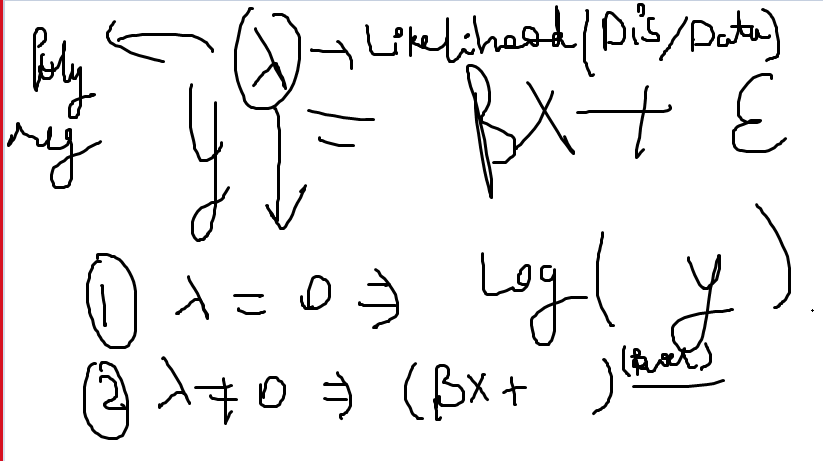

# Segregating Dependent and Independent Variables:-

In [37]:
X = df_eda[final_features].drop(columns=['volume'])
Y = df_eda['volume']
array_Y = np.array(Y).reshape(-1,1)
X.shape, Y.shape

((56, 12), (56,))

# Building Linear regression using Statsmodel

In [38]:
import statsmodels.api as sm

In [39]:
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 volume   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     13.47
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           6.46e-11
Time:                        11:13:13   Log-Likelihood:                -704.12
No. Observations:                  56   AIC:                             1434.
Df Residuals:                      43   BIC:                             1461.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                             -3.182e+08   8.28e+08     -0.384      0.703   -1.99e+09    1.35e+09
wholesale-producer price index, us$ basis_monthly  -867.9373   4650.460     -0.187      0.853   -1.02e+04    8510.610
real gdp per capita, us$_quarterly                  -33.9711    116.504     -0.292      0.772    -268.925     200.982
real consumption per capita, us$_quarterly           -3.3774    108.134     -0.031      0.975    -221.450     214.696
nominal gross private saving, us$_quarterly        1079.9800   1979.981      0.545      0.588   -2913.033    5072.993
disposable personal income, us$_quarterly          -676.9798   1452.488     -0.466      0.644   -3606.201    2252.241
population: age bracket 65+_quarterly             -8.006e+05      2e+06     -0.401      0.691   -4.83e+06    3.23e+06
selling days                                       2.667e+04   1.11e+04      2.396      0.021    4218.689    4.91e+04
month                                              3.868e+04   1.35e+04      2.855      0.007    1.14e+04     6.6e+04
quarter                                           -6.594e+04   1.11e+05     -0.593      0.556    -2.9e+05    1.58e+05
year                                               1.612e+05   4.16e+05      0.388      0.700   -6.78e+05       1e+06
t-avg                                              6615.8585    725.447      9.120      0.000    5152.856    8078.861
unemployment rate_quarterly                       -3.494e+04   6.68e+04     -0.523      0.603    -1.7e+05    9.97e+04
==============================================================================
Omnibus:                       10.308   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.633
Skew:                          -0.814   Prob(JB):                      0.00491
Kurtosis:                       4.381   Cond. No.                     3.98e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Now let us look at the data from time_series point of view:-

In [40]:
df_time = df_eda[['volume', 't-avg', 'selling days']]

# Changing the column names.
df_time.columns = ['sales', 't-avg', 'sale_days_per_month']

# visualizing the dataset:-
df_time.head(5)

,sales,t-avg,sale_days_per_month
Date,,,
2017-01-01,525295.37,15.2,22
2017-02-01,578702.22,16.1,20
2017-03-01,696500.24,20.8,23
2017-04-01,712376.13,36.7,20
2017-05-01,931286.20,49.5,23


# Checking stationarity of target variable

In [41]:
import statsmodels.tsa.stattools as sts

### Returns

1. adf : test statistic.
2. pvalue : MacKinnon"s approximate p-value based on MacKinnon (1994, 2010).
3. usedlag : The number of lags used to determine t statistic.
4. nobs : The number of observations used for the ADF regression and calculation of the critical values.
5. critical values : Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010).


In [42]:
critical_value,p_value = sts.adfuller(df_time.sales)[0:2]
confidence_intervals = sts.adfuller(df_time.sales)[4]
print(f' The critical value comes out to be {critical_value}\n', f'The p value is {p_value}\n', f'The corresponding \
confidence intervals are shown below:-\n {confidence_intervals}')

 The critical value comes out to be -0.6973067227400476
 The p value is 0.8474459245227353
 The corresponding confidence intervals are shown below:-
 {'1%': -3.5885733964124715, '5%': -2.929885661157025, '10%': -2.6031845661157025}


In [43]:
# Since t statistic is greater than all the critical values at different
# confidence intervals. we accept the null hypothesis and Our data 
# is not stationary in nature

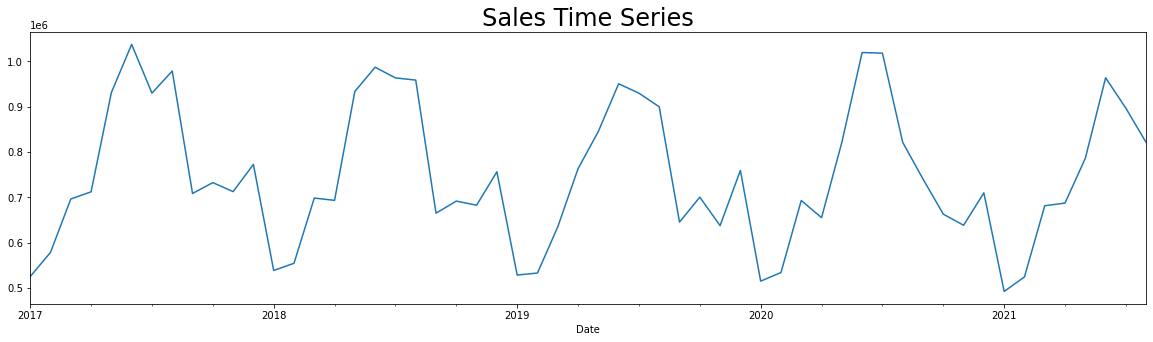

In [44]:
df_time.sales.plot(figsize=(20,5))
plt.title("Sales Time Series", size=24)
plt.show()

## Thus, out time series is non stationary.

# Checking stationarity of time series after 1st order differencing.

In [45]:
df_time['first_diff']  = df_time['sales'].diff()
df_time.head()

,sales,t-avg,sale_days_per_month,first_diff
Date,,,,
2017-01-01,525295.37,15.2,22,NaN
2017-02-01,578702.22,16.1,20,53406.85
2017-03-01,696500.24,20.8,23,117798.02
2017-04-01,712376.13,36.7,20,15875.89
2017-05-01,931286.20,49.5,23,218910.07


In [46]:
critical_value,p_value = sts.adfuller(df_time.first_diff[1:])[0:2]
confidence_intervals = sts.adfuller(df_time.first_diff[1:])[4]
print(f' The critical value comes out to be {critical_value}\n', f'The p value is {p_value}\n', f'The corresponding \
confidence intervals are shown below:-\n {confidence_intervals}')

 The critical value comes out to be -17.77448306017404
 The p value is 3.2968833349932155e-30
 The corresponding confidence intervals are shown below:-
 {'1%': -3.5885733964124715, '5%': -2.929885661157025, '10%': -2.6031845661157025}


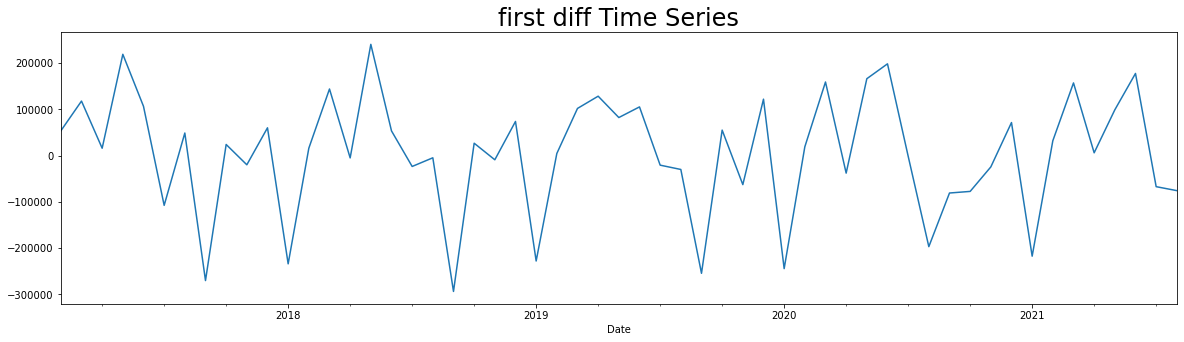

In [47]:
df_time.first_diff[1:].plot(figsize=(20,5))
plt.title("first diff Time Series", size=24)
plt.show()

### Since the p_value is less than 0.05 so our time series has become stationary after 1st order differencing.

# Checking the Seasonality and Trend Using Seasonal_decompose functionality

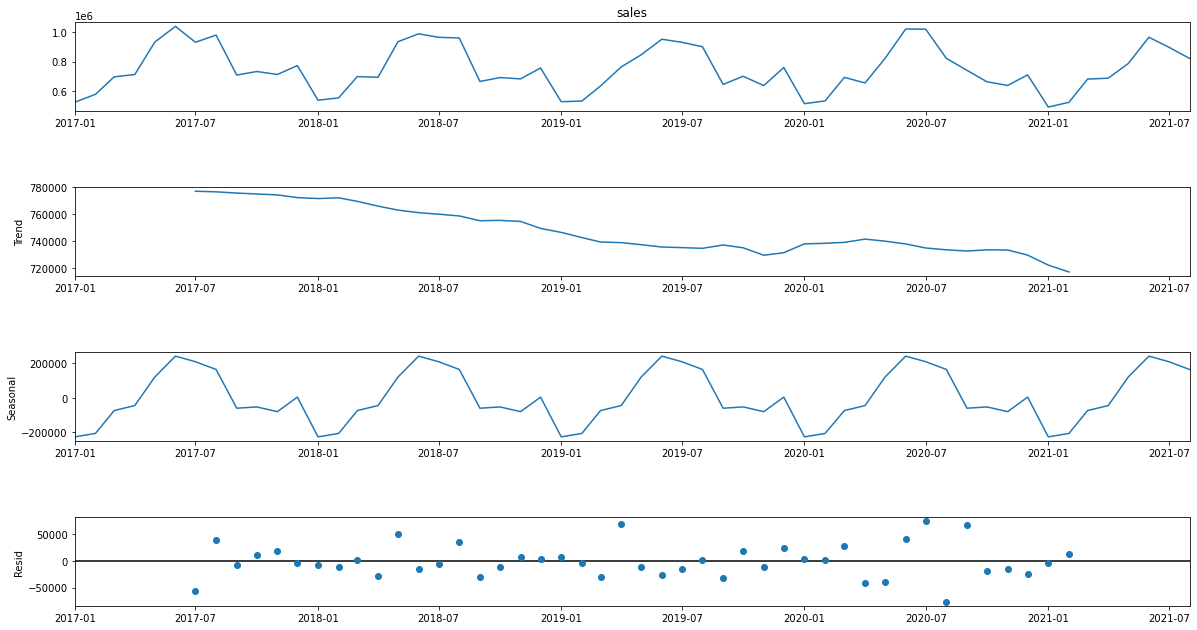

In [48]:
import statsmodels.api as sm
season_decomp =sm.tsa.seasonal_decompose(df_time['sales'],model='additive');
fig = season_decomp.plot()
fig.set_figheight(10)
fig.set_figwidth(20)
plt.show()

### So, overall we can see a 12 month seasonality along with a somewhat downward trend in the data.

# Doing Train-Test split on temporal basis:-


In [49]:
df_time.head(5)

,sales,t-avg,sale_days_per_month,first_diff
Date,,,,
2017-01-01,525295.37,15.2,22,NaN
2017-02-01,578702.22,16.1,20,53406.85
2017-03-01,696500.24,20.8,23,117798.02
2017-04-01,712376.13,36.7,20,15875.89
2017-05-01,931286.20,49.5,23,218910.07


In [50]:
# doing train-test split on temporal basis:-
independent = df_time[['t-avg', 'sale_days_per_month']]
dependent = df_time[['sales']]

train_X = independent.iloc[:50]
test_X =  independent.iloc[50:]
train_Y = dependent.iloc[:50]
test_Y = dependent.iloc[50:]

print(train_X.shape,train_Y.shape)
print(test_X.shape,test_Y.shape)

(50, 2) (50, 1)
(6, 2) (6, 1)


# Building a Baseline Model

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
model_SARIMA_1 = SARIMAX(endog = train_Y, seasonal_order=(1,1,2,12), exog=train_X ,order=(2,1,2))

results= model_SARIMA_1.fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                   50
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -445.981
Date:                            Tue, 26 Apr 2022   AIC                            911.962
Time:                                    11:13:17   BIC                            928.071
Sample:                                01-01-2017   HQIC                           917.641
                                     - 02-01-2021                                         
Covariance Type:                              opg                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
t-avg                4427.4908   2087.244      2.121      0.034     336.567    8518.415
sale_days_per_month   2.34e+04   4599.798      5.086      0.000    1.44e+04    3.24e+04
ar.L1                  -0.6271      1.530     -0.410      0.682      -3.625       2.371
ar.L2                   0.0726      0.564      0.129      0.898      -1.034       1.179
ma.L1                  -0.0575      1.542     -0.037      0.970      -3.081       2.966
ma.L2                  -0.3807      0.622     -0.612      0.541      -1.600       0.839
ar.S.L12               -0.9591      1.782     -0.538      0.590      -4.451       2.533
ma.S.L12                0.6977      2.095      0.333      0.739      -3.409       4.805
ma.S.L24               -0.2112      0.637     -0.331      0.740      -1.460       1.038
sigma2               1.796e+09      0.004   4.23e+11      0.000     1.8e+09     1.8e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.75   Jarque-Bera (JB):                 0.66
Prob(Q):                              0.19   Prob(JB):                         0.72
Heteroskedasticity (H):               2.12   Skew:                            -0.20
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.43e+28. Standard errors may be unstable.
"""

In [53]:
model_SARIMA_2 = SARIMAX(endog = train_Y, seasonal_order=(1,1,2,12), exog=train_X ,order=(2,1,3))

results_2= model_SARIMA_2.fit()
results_2.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                   sales   No. Observations:                   50
Model:             SARIMAX(2, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood                -443.789
Date:                                 Tue, 26 Apr 2022   AIC                            909.578
Time:                                         11:13:20   BIC                            927.298
Sample:                                     01-01-2017   HQIC                           915.825
                                          - 02-01-2021                                         
Covariance Type:                                   opg                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
t-avg                4427.5240   1846.331      2.398      0.016     808.781    8046.267
sale_days_per_month   2.34e+04   8988.069      2.603      0.009    5778.910     4.1e+04
ar.L1                  -0.2719      1.036     -0.262      0.793      -2.303       1.760
ar.L2                   0.3723      0.379      0.982      0.326      -0.371       1.115
ma.L1                  -0.8539      1.052     -0.812      0.417      -2.915       1.207
ma.L2                  -0.2161      1.529     -0.141      0.888      -3.212       2.780
ma.L3                   0.5015      0.809      0.620      0.536      -1.085       2.088
ar.S.L12               -0.8883      2.166     -0.410      0.682      -5.133       3.357
ma.S.L12                0.7578      2.432      0.312      0.755      -4.009       5.524
ma.S.L24               -0.1636      0.327     -0.500      0.617      -0.805       0.478
sigma2               1.905e+09      0.010   1.94e+11      0.000     1.9e+09     1.9e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 2.52
Prob(Q):                              0.80   Prob(JB):                         0.28
Heteroskedasticity (H):               6.12   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.49e+27. Standard errors may be unstable.
"""

#  The LLR Test

Null Hypothesis : First model is better

Alternate Hypothesis : Second model is better

if p value< 0.05 than we reject our null hypothesis and second model is better

else first model is better.

In [54]:
from scipy.stats.distributions import chi2
from math import sqrt

In [55]:
def LLR_test(mod_1,mod_2,DF=1):
    L1 = mod_1.fit().llf         # Here .llf -> extracts the Log-Likelihood
    L2 = mod_2.fit().llf
    LR_test_statistic = 2*(L2-L1)
    p = chi2.sf(LR_test_statistic, DF).round(3)
    return p
    

In [56]:
LLR_test(model_SARIMA_1,model_SARIMA_2)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.036

# Thus, the simpler SARIMA model performs better than the more complex SARIMA model.

# Let's look at the residuals

In [57]:
train_X['residuals'] = results.resid.abs()
train_X.head(5)

,t-avg,sale_days_per_month,residuals
Date,,,
2017-01-01,15.2,22,56697.108217
2017-02-01,16.1,20,66208.937456
2017-03-01,20.8,23,76696.337818
2017-04-01,36.7,20,51315.079218
2017-05-01,49.5,23,129909.649017


# Looking at autocorrelation plots:-

In [58]:
import statsmodels.graphics.tsaplots as sgt

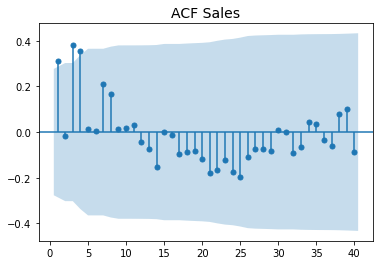

In [59]:
# Here the zero value denotes whether we want to include the current time period values or not.

sgt.plot_acf(train_X.residuals, lags = 40, zero =False )
plt.title("ACF Sales", size=14)
plt.show()

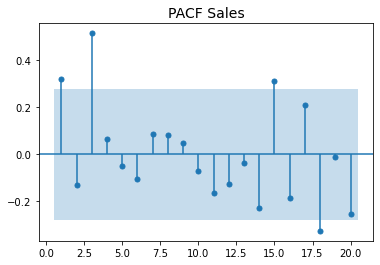

In [60]:
# ACF of white noise model
sgt.plot_pacf(train_X.residuals, lags = 20, zero =False )
plt.title("PACF Sales", size=14)
plt.show()

# Thus, our residuals from the simpler SARIMA model are showcasing white noise behaviour.

In [61]:
train_size = train_X.shape[0]
test_size = test_X.shape[0]
train_size,test_size

(50, 6)

In [62]:
predictions= results.predict(start='2020-3-01', end ='2020-08-01')

In [63]:
predictions

2020-03-01    626801.686865
2020-04-01    727290.317802
2020-05-01    785643.216274
2020-06-01    960840.028999
2020-07-01    947511.541346
2020-08-01    905102.495123
Freq: MS, Name: predicted_mean, dtype: float64

In [64]:
test_Y

,sales
Date,
2021-03-01,681611.67
2021-04-01,687588.50
2021-05-01,786493.33
2021-06-01,964002.76
2021-07-01,896777.09
2021-08-01,820995.83


In [65]:
test_Y.shape[0]

6

In [66]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [67]:
accuracy = 100 - mean_absolute_percentage_error(test_Y,predictions)
MAPE = mean_absolute_percentage_error(test_Y,predictions)
accuracy,MAPE

(83.05953422839092, 16.940465771609084)

In [68]:
# Assumptions of Linear Regression.
# Negative skewed/left skewed = Log transformation.
# Positive skewed/Right skewed = Exponential transformation.
# Focus on LR model and SARIMA.
# Use Variance Threshold.